# Ejercicio 3: 

Escribe un programa en Python que use Biopython para hacer una búsqueda BLAST de una secuencia de ADN que leas de un fichero en formato FASTA. El programa debe hacer la búsqueda en la base de datos nr y filtrar los resultados por el organismo que elijas. El programa debe mostrar por pantalla el número de resultados obtenidos y el E-value medio de los mismos. Hágalo de forma online y local.

### 1.1. Instalación de BLAST

1. Se descarga la versión para el equipo de BLAST desde el siguiente enlace: [BLAST](https://ftp.ncbi.nlm.nih.gov/blast/executables/blast+/LATEST/)
2. Se ejecuta, en nuestro caso, el *.exe* descargado y se instala en el equipo.
3. Se configura el *path* de BLAST como variable de entorno del sistema.
4. Se verifica la instalación con el comando `blastn --version`.

### 1.2. Secuencia de ADN por teclado

In [1]:
from processing.data_loader import DataLoaderFactory

In [2]:
sequence = DataLoaderFactory.get_loader('api').load(('NM_000518.5',), 'nucleotide')

File NM_000518_5.fasta created


Así, se ha obtenido la siguiente secuencias de ADN para realizar la búsqueda BLAST:

In [3]:
sequence

[SeqRecord(seq=Seq('ACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGACACCATGG...CAA'), id='NM_000518.5', name='NM_000518.5', description='NM_000518.5 Homo sapiens hemoglobin subunit beta (HBB), mRNA', dbxrefs=[])]

No obstante, nos interesa quedarnos únicamente con la secuencia en sí:

In [4]:
sequence = sequence[0].seq

### 3. Implementación online

In [5]:
from Bio.Blast import NCBIWWW, NCBIXML

In [6]:
def search_online_sequence(sequence, organism_filter):
    result = NCBIWWW.qblast("blastn", "nr", sequence)
    blast_records = NCBIXML.read(result)

    print(f"Resultados BLAST para la secuencia sin filtrar por organismo:")
    print(f"Número de alineamientos: {len(blast_records.alignments)}")

    best_alignment = blast_records.alignments[0]
    best_hsp = best_alignment.hsps[0]
    e_value = best_hsp.expect
    description = best_alignment.title

    print(f"E-value del mejor resultado: {e_value}")
    print(f"Descripción de la secuencia más similar: {description}")

    if not blast_records.alignments:
        print("No se encontraron resultados.")
        return
    
    filtered_alignments = []
    for alignment in blast_records.alignments:
        if organism_filter.lower() in alignment.title.lower():
            filtered_alignments.append(alignment)

    if not filtered_alignments:
        print(f"No se encontraron resultados para el organismo '{organism_filter}'.")
        return
    
    num_results = len(filtered_alignments)
    
    best_alignment = filtered_alignments[0]
    best_hsp = best_alignment.hsps[0]
    e_value = best_hsp.expect
    description = best_alignment.title
    
    print("\nResultados BLAST filtrados por organismo:")
    print(f"Número de resultados: {num_results}")
    print(f"E-value del mejor resultado: {e_value}")
    print(f"Descripción de la secuencia más similar: {description}")

In [7]:
search_online_sequence(sequence, 'Homo sapiens')

Resultados BLAST para la secuencia sin filtrar por organismo:
Número de alineamientos: 50
E-value del mejor resultado: 0.0
Descripción de la secuencia más similar: gi|1401724401|ref|NM_000518.5| Homo sapiens hemoglobin subunit beta (HBB), mRNA

Resultados BLAST filtrados por organismo:
Número de resultados: 18
E-value del mejor resultado: 0.0
Descripción de la secuencia más similar: gi|1401724401|ref|NM_000518.5| Homo sapiens hemoglobin subunit beta (HBB), mRNA


En efecto, se ha encontrado la secuencia que se buscaba. Probaremos ahora a modificar la secuencia, añadiendo mutaciones aleatorias, con el fin de comprobar si el programa es capaz de encontrar la secuencia original.

In [8]:
import random

In [35]:
def introduce_mutation(sequence, num_mutations=1):
    bases = ['A', 'T', 'C', 'G']
    sequence_list = list(sequence)

    for _ in range(num_mutations):
        mutation_idx = random.choice(range(len(sequence)))
        current_base = sequence_list[mutation_idx]
        possible_bases = [base for base in bases if base != current_base]
        new_base = random.choice(possible_bases)
        sequence_list[mutation_idx] = new_base
    
    mutated_sequence = ''.join(sequence_list)
    return mutated_sequence

In [36]:
mutated_sequence = introduce_mutation(sequence, num_mutations=15)
print(sequence)
print(mutated_sequence)

ACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGACACCATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGCTCCTGGGCAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCACTAAGCTCGCTTTCTTGCTGTCCAATTTCTATTAAAGGTTCCTTTGTTCCCTAAGTCCAACTACTAAACTGGGGGATATTATGAAGGGCCTTGAGCATCTGGATTCTGCCTAATAAAAAACATTTATTTTCATTGCAA
AAATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGACACCATGGTGCATCTGACTCCTGAGGAGAAGTTTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGTTGAGGCCGGGGGCAGTCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGAGCACCTTTGTCACACTGAGTGAGCTGCACTGTGACAGGCTGCACGTGGATCCTGAGAACTTCAGGCTCCTG

In [37]:
search_online_sequence(mutated_sequence, 'Homo sapiens')

Resultados BLAST para la secuencia sin filtrar por organismo:
Número de alineamientos: 50
E-value del mejor resultado: 0.0
Descripción de la secuencia más similar: gi|1401724401|ref|NM_000518.5| Homo sapiens hemoglobin subunit beta (HBB), mRNA

Resultados BLAST filtrados por organismo:
Número de resultados: 17
E-value del mejor resultado: 0.0
Descripción de la secuencia más similar: gi|1401724401|ref|NM_000518.5| Homo sapiens hemoglobin subunit beta (HBB), mRNA


Vemos como seguimos obteniendo el mismo resultado. Esto es evidente, puesto que tan solo se ha alterado un 2.3% de la secuencia original.

In [39]:
15/len(sequence)

0.02388535031847134

 Ahora bien, está claro que para el organismo humano (Homo Sapiens) la secuencia de mayor similitud es exactamente la misma que la de partida, ¿pero que ocurre con el resto de organismos? Veamos

In [26]:
import pandas as pd
import numpy as np

In [10]:
def search_online_sequences(sequence):
    result = NCBIWWW.qblast("blastn", "nr", sequence)
    blast_records = NCBIXML.read(result)

    data = []

    if not blast_records.alignments:
        print("No se encontraron resultados.")
        return pd.DataFrame()
    
    for alignment in blast_records.alignments:
        organism = alignment.title
        sequence_data = alignment.hsps[0].align_length
        e_value = alignment.hsps[0].expect
        score = alignment.hsps[0].score
        
        data.append({
            "Organismo": organism,
            "Secuencia": sequence_data,
            "E-value": e_value,
            "Score": score
        })
    
    if not data:
        print(f"No se encontraron resultados.")
        return pd.DataFrame()
    
    df = pd.DataFrame(data)
    return df

In [11]:
results = search_online_sequences(sequence)

In [12]:
hemoglobin = 0
total = 0

for i in range(len(results)):
    print(results['Organismo'][i])
    if 'hemoglobin' in results['Organismo'][i].lower():
        hemoglobin += 1
    total += 1

gi|1401724401|ref|NM_000518.5| Homo sapiens hemoglobin subunit beta (HBB), mRNA
gi|2468480781|ref|XM_508242.5| PREDICTED: Pan troglodytes hemoglobin subunit beta (HBB), mRNA
gi|2694496772|ref|XM_003819029.5| PREDICTED: Pan paniscus hemoglobin subunit beta (LOC100976465), mRNA
gi|13937928|gb|BC007075.1| Homo sapiens hemoglobin, beta, mRNA (cDNA clone MGC:14540 IMAGE:4292125), complete cds
gi|29436|emb|V00497.1| Human messenger RNA for beta-globin
gi|40886940|gb|AY509193.1| Homo sapiens hemoglobin beta mRNA, complete cds
gi|2695096866|ref|XM_019036164.3| PREDICTED: Gorilla gorilla gorilla hemoglobin subunit beta (LOC101126932), mRNA
gi|2694676380|ref|XM_002822127.6| PREDICTED: Pongo abelii hemoglobin subunit beta (HBB), mRNA
gi|2695876965|ref|XM_054440830.2| PREDICTED: Pongo pygmaeus hemoglobin subunit beta (HBB), mRNA
gi|2491688240|ref|XM_055282707.1| PREDICTED: Symphalangus syndactylus hemoglobin subunit beta (HBB), mRNA
gi|1743165722|ref|XM_004090649.3| PREDICTED: Nomascus leucogenys 

In [13]:
per = hemoglobin/total
print(f"Un {per*100}% de los resultados contienen la palabra 'hemoglobin'.")

Un 86.0% de los resultados contienen la palabra 'hemoglobin'.


En cuanto a los organismos:

In [14]:
organisms = [
    "Homo sapiens",  
    "Pan troglodytes",  
    "Pan paniscus",  
    "Gorilla",  
    "Pongo abelii",  
    "Pongo pygmaeus",  
    "Symphalangus syndactylus",  
    "Nomascus leucogenys",  
    "Hylobates moloch",  
    "Colobus angolensis palliatus",  
    "Trachypithecus francoisi",
    "Rhinopithecus roxellana",  
    "Rhinopithecus bieti",  
    "Mandrillus leucophaeus",  
    "Piliocolobus tephrosceles",  
    "Macaca fascicularis",  
    "Macaca thibetana",  
    "Chlorocebus sabaeus",  
    "Aotus nancymaae",
    "Theropithecus gelada",  
    "Sapajus apella",  
    "Saimiri boliviensis boliviensis",  
    "Cebus imitator",  
    "Callithrix jacchus",  
    "Carlito syrichta",  
    "Synthetic construct",  
    "Macaca nemestrina",  
    "Pan troglodytes GLNA1"
]

organism_count = {organism: 0 for organism in organisms}

In [15]:
for i in range(len(results)):
    for organism in organisms:
        if organism in results['Organismo'][i]:
            organism_count[organism] += 1
            break

In [16]:
organisms = dict(sorted(organism_count.items(), key=lambda item: item[1], reverse=True))
organisms

{'Homo sapiens': 18,
 'Mandrillus leucophaeus': 2,
 'Macaca fascicularis': 2,
 'Pan troglodytes': 1,
 'Pan paniscus': 1,
 'Gorilla': 1,
 'Pongo abelii': 1,
 'Pongo pygmaeus': 1,
 'Symphalangus syndactylus': 1,
 'Nomascus leucogenys': 1,
 'Hylobates moloch': 1,
 'Colobus angolensis palliatus': 1,
 'Trachypithecus francoisi': 1,
 'Rhinopithecus roxellana': 1,
 'Rhinopithecus bieti': 1,
 'Piliocolobus tephrosceles': 1,
 'Macaca thibetana': 1,
 'Chlorocebus sabaeus': 1,
 'Aotus nancymaae': 1,
 'Theropithecus gelada': 1,
 'Sapajus apella': 1,
 'Saimiri boliviensis boliviensis': 1,
 'Cebus imitator': 1,
 'Callithrix jacchus': 1,
 'Carlito syrichta': 1,
 'Synthetic construct': 1,
 'Macaca nemestrina': 1,
 'Pan troglodytes GLNA1': 0}

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Número de alineamientos encontrados')

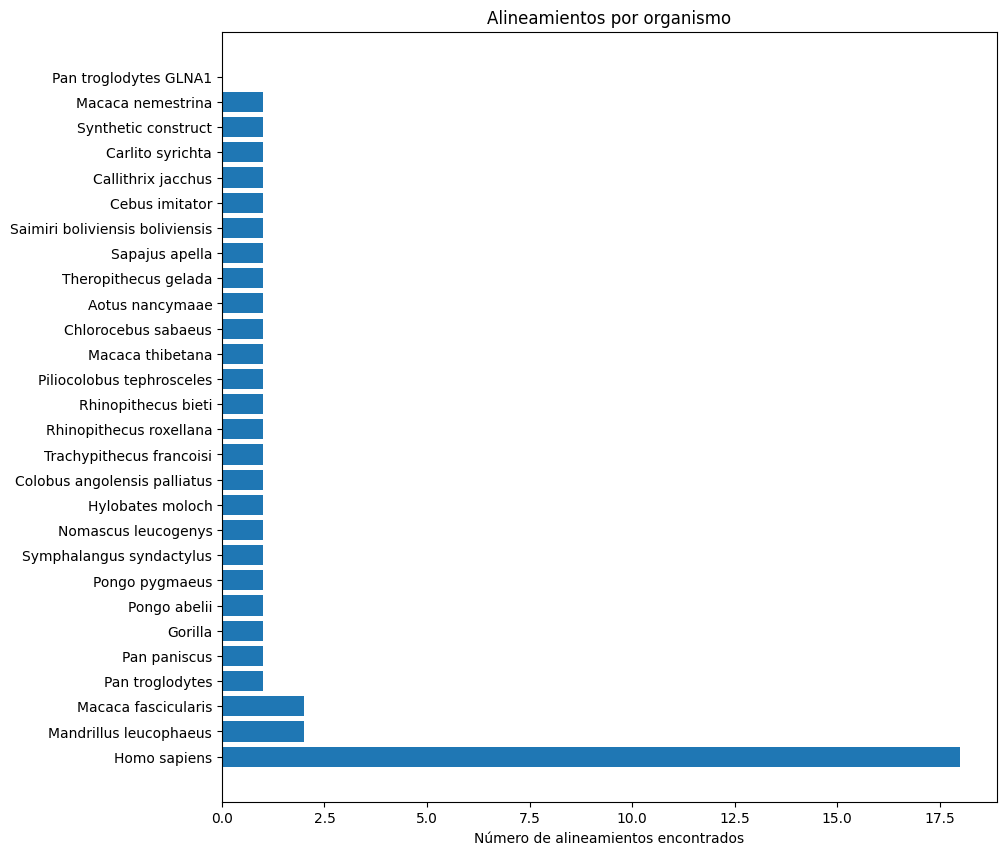

In [18]:
keys = list(organisms.keys())
values = list(organisms.values())

plt.figure(figsize=(10,10))
plt.barh(keys, values)

plt.title('Alineamientos por organismo')
plt.xlabel('Número de alineamientos encontrados')

Vemos como los organismos en los que más alineamientos se han encontrado, después de en los humanos, son:
- **Mandrillus leucophaeus**: una especie de primate catarrino de la familia Cercopithecidae similar en apariencia al mandril, pero sin la cara vivamente coloreada de este. Se encuentra en los bosques de Camerún, Nigeria y en la isla de Bioko, en Guinea Ecuatorial.
- **Macaca fascicularis**: una especie de primate catarrino de la familia Cercopithecidae. Se encuentra principalmente en Indonesia, Filipinas y Malasia, así como en las islas Andamán.

Pese a no ser este el organismo al que pertenece la secuencia de nucleótidos buscada, estos son realmente parecidos a los humanos. De hecho, la gran mayoría de organismo encontrados se corresponden a distintas especies de primates, por lo que tiene sentido tantos alineamientos para tan diversas especies. Si agrupamos todas ellas en categorías, obtenemos lo siguiente:

In [93]:
categories = {
    "Homo sapiens": ["Homo sapiens"],
    "Primates": [
        "Pan troglodytes", "Pan paniscus", "Gorilla", "Pongo abelii", "Pongo pygmaeus",
        "Symphalangus syndactylus", "Nomascus leucogenys", "Hylobates moloch", 
        "Colobus angolensis palliatus", "Trachypithecus francoisi", "Rhinopithecus roxellana",
        "Rhinopithecus bieti", "Mandrillus leucophaeus", "Piliocolobus tephrosceles", 
        "Macaca fascicularis", "Macaca thibetana", "Chlorocebus sabaeus", "Aotus nancymaae", 
        "Theropithecus gelada", "Sapajus apella", "Saimiri boliviensis boliviensis", 
        "Cebus imitator", "Callithrix jacchus", "Carlito syrichta", "Macaca nemestrina",
        "Pan troglodytes GLNA1"
    ],
    "Bacteria": [],
    "Synthetic construct": ["Synthetic construct"]
}

categories_count = {item[0]: 0 for item in categories.items()}

In [96]:
category_labels = []

for i in range(len(results)):
    for organism in organisms:
        if organism in results['Organismo'][i]:
            for category, category_organisms in categories.items():
                if organism in category_organisms:
                    category_labels.append(category)
                    categories_count[category] += 1
                    break

categories_count = dict(sorted(categories_count.items(), key=lambda item: item[1], reverse=True))
categories_count

{'Primates': 58, 'Homo sapiens': 36, 'Synthetic construct': 12, 'Bacteria': 0}

Text(0.5, 0, 'Número de alineamientos encontrados')

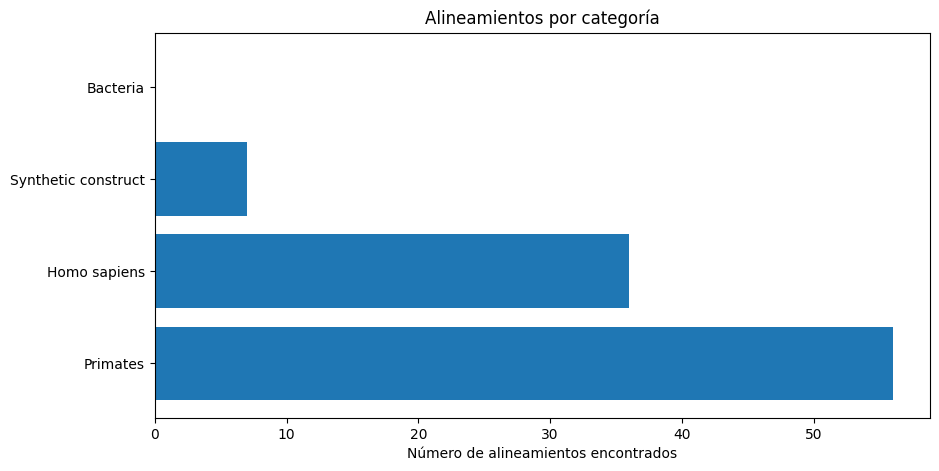

In [73]:
keys = list(categories_count.keys())
values = list(categories_count.values())

plt.figure(figsize=(10,5))
plt.barh(keys, values)

plt.title('Alineamientos por categoría')
plt.xlabel('Número de alineamientos encontrados')

Vemos como ahora parecen haber más alineamiento con humanos que con primates. Sin embargo, esto no implica que todos los alineamientos sean buenos. De hecho, sería lógico pensar que los alineamientos humanos sean, de media, mejores que los del resto de cateogrías (en este caso del primate). No obstante, esto no ocurre.

In [68]:
category_scores = {
    "Homo sapiens": [],
    "Primates": [],
    "Bacteria": [],
    "Synthetic construct": []
}

In [49]:
for i in range(len(results)):
    for organism in organisms:
        if organism in results['Organismo'][i]:
            for category, category_organisms in categories.items():
                if organism in category_organisms:
                    category_scores[category].append(results.iloc[i]['Score'].item())
            break

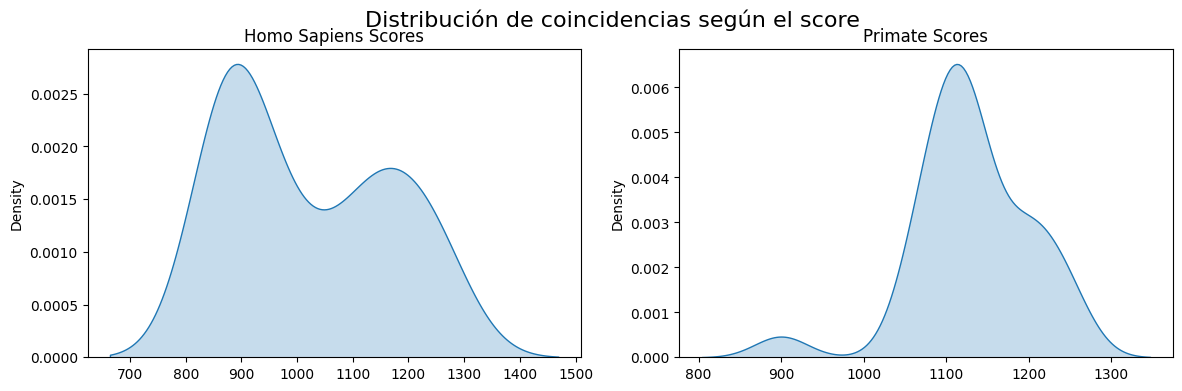

In [57]:
def plot_matches(homo_sap_cores, prim_scores):
    fig, axs = plt.subplots(1, 2, figsize=(14,4))

    sns.kdeplot(homo_sap_cores, ax=axs[0], label="Q1", fill=True)
    sns.kdeplot(prim_scores, ax=axs[1], label="Q2", fill=True)
    
    axs[0].set_title(f"Homo Sapiens Scores")
    axs[1].set_title(f"Primate Scores")

    plt.suptitle("Distribución de coincidencias según el score", fontsize=16)

    plt.show()

plot_matches(category_scores['Homo sapiens'], category_scores['Primates'])

Se puede apreciar como las alineaciones en los humanos parecen generar una distribución de valores de `score` más dispersa, mostrando una mayor varianza. Por otra parte, los primates generan una distribución con menos varianza y abarcan unos valores, de media, mejores.

### 1.4. Implementación local

Una vez instalado blast, se procede a descargar la base de datos *nr* que se utilizará para la búsqueda. Para ello, se ejecuta el siguiente comando:


In [37]:
from Bio.Blast.Applications import NcbiblastxCommandline

import os
import json
import time

In [54]:
def search_local_protein(output_file = "./results/blast_results_locally.json"):
    os.environ["BLASTDB"] = input("Introduce la ruta de la base de datos de BLAST: ")
    database = input("Introduce la base de datos donde buscar (ej. nr):")
    fasta = input("Introduce la ruta del fichero fasta:")

    blastx_cline = NcbiblastxCommandline(
        query=fasta,
        db=database,
        evalue=0.001,
        outfmt=5,
        out="results.xml"
    )

    blastx_cline()
    print('Búsqueda realizada')


    with open("results.xml") as result_handle:
        blast_records = NCBIXML.parse(result_handle)
        filtered_results = []

        for blast_record in blast_records:
            for alignment in blast_record.alignments:
                for hsp in alignment.hsps:
                    if hsp.expect < 0.001:
                        result = {
                            "id": alignment.hit_id,
                            "length": alignment.length,
                            "evalue": hsp.expect,
                            "identity_percentage": (hsp.identities / hsp.align_length) * 100
                        }
                        filtered_results.append(result)

    with open(output_file, "w") as f:
        json.dump(filtered_results, f, indent=4)

    print(f"Resultados guardados en formato JSON en: {output_file}")

- Para la base de datos **nr** con las particiones desde el cero hasta el 20.

In [45]:
start = time.time()
search_local_protein()
end = time.time()

Búsqueda realizada
Resultados guardados en formato JSON en: ./results/blast_results_locally.json


In [49]:
print(f'La búsqueda ha durado {(end - start)/60} minutos')

La búsqueda ha durado 31.383215431372324 minutos


- Para la base de datos **swissprot** completa

In [55]:
start = time.time()
search_local_protein("./results/blast_swissprot_results_locally.json")
end = time.time()

Búsqueda realizada
Resultados guardados en formato JSON en: ./results/blast_swissprot_results_locally.json


In [56]:
print(f'La búsqueda ha durado {(end - start)} segundos')

La búsqueda ha durado 34.22447085380554 segundos
